# Getting Data

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import nltk
from nltk import FreqDist
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv("/gdrive/My Drive/MGHectorComments.csv")

In [4]:
data.head()

,selection1_name
0,Quote:\nOriginally Posted by blackwasp\nThanks...
1,What's happening with the names of cars these ...
2,Quote:\nOriginally Posted by blackwasp\nThanks...
3,Just quickly Googled about this Hector/Baojun ...
4,Quote:\nOriginally Posted by rovingeye\nJust q...


In [49]:
data.shape

(1623, 1)

# Fetch word count for each Review


In [50]:
#Fetch wordcount for each abstract
data['word_count'] = data['selection1_name'].apply(lambda x: len(str(x).split(" ")))
data[['selection1_name','word_count']].head()

,selection1_name,word_count
0,Quote:\nOriginally Posted by blackwasp\nThanks...,37
1,What's happening with the names of cars these ...,56
2,Quote:\nOriginally Posted by blackwasp\nThanks...,128
3,Just quickly Googled about this Hector/Baojun ...,22
4,Quote:\nOriginally Posted by rovingeye\nJust q...,40


In [51]:
##Descriptive statistics of word counts
data.word_count.describe()

count    1623.000000
mean      122.548983
std       148.300849
min         1.000000
25%        49.000000
50%        86.000000
75%       153.000000
max      2308.000000
Name: word_count, dtype: float64

# Most common and uncommon words

In [52]:
#Identify common words
freq = pd.Series(' '.join(data['selection1_name']).split()).value_counts()[:20]
freq

the     10701
to       4767
a        4336
and      3994
I        3676
is       3307
of       3275
in       3104
for      2176
that     1967
it       1832
by       1682
be       1677
on       1638
with     1571
have     1446
are      1384
The      1186
this     1154
not      1131
dtype: int64

In [53]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data 
         ['selection1_name']).split()).value_counts()[-20:]
freq1


officials,                 1
up"                        1
nowhere,                   1
bumper.                    1
170hp                      1
open/close                 1
disappoint                 1
dumping                    1
ogling                     1
exceptional/disruptive.    1
volumetric                 1
set-up                     1
dealership?                1
cynic                      1
Extend                     1
say-                       1
opening.                   1
car-making.                1
launched,                  1
something.                 1
dtype: int64

# Text Pre-processing

####Text pre-processing can be divided into two broad categories — noise removal & normalization. Data components that are redundant to the core text analytics can be considered as noise.


In [54]:
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
stemming: invers
lemmatization: inversely
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Stop Word Removal and adding Custom Stop Word

Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences. These words need to be removed before we analyse the text, so that the frequently used words are mainly the words relevant to the context and not common words used in the text.

In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large","harrier","mg","hector","car","vehicle","even","seltos",
             "number","like","well","get","see","time","way","people","however","could","much","take","look",
             "good","think","people","kia","test","may","need","td","sure","right","lot","go","come","seem",
             "many","really","still","might","review","know","big","india","drive","got","year","seems","going",
             "booking","issue","say","around","thing","feel","said","pricing","already","make","check","another",
             "first","give","quite","launch","product","long","creta","road","point","wait","auto","since","suv",
             "tata","back","variant","part","compass","bit","case","agree","expect","company","hyundai","hope","available","without","something",
             "mentioned","want","offer","buy","due","either","etc","thought","team","bhp","though","although",
             "day","sale","option","different","indian","sale","market","option","reason","saw","brand","guess","dealer",
            "segment","figure","especially","question","thought","guy","end","least","used","understand","top end","waiting",
             "seen","close","overall","getting","petrol","diesel","gap","panel","booked","month","done","top","customer","showroom",
             "also", "iv", "one", "two","would","car", "new", "previously", "shown","quote","originally","posted","post","owner","youtube","www","http"]
stop_words = stop_words.union(new_words)

# Building Cleaned Corpus

In [0]:
corpus = []
for i in range(0, 1623):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['selection1_name'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [66]:
#View corpus item
print(corpus[100])

jailbird fynix club fb page sharp lost count similar post attachment mod please remove inappropriate actually found person side bonnet open added smoke burning comment found registration person actual confronted acknowledged clicked pic


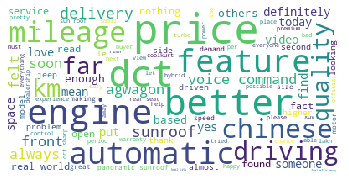

In [73]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

# Creating a vector of word counts
As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words. We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))


max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.


max_features — determines the number of columns in the matrix.


n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.


An encoded vector is returned with a length of the entire vocabulary.

In [75]:
# Listing a Review in bag of Word
list(cv.vocabulary_.keys())[:10]

['blackwasp',
 'thanks',
 'automobile',
 'sending',
 'image',
 'city',
 'never',
 'chance',
 'click',
 'picture']

# **Visualize top N uni-grams, bi-grams & tri-grams**

[Text(0, 0, 'car'),
 Text(0, 0, 'kmpl'),
 Text(0, 0, 'dct'),
 Text(0, 0, 'price'),
 Text(0, 0, 'engine'),
 Text(0, 0, 'mileage'),
 Text(0, 0, 'booking'),
 Text(0, 0, 'better'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'km'),
 Text(0, 0, 'city'),
 Text(0, 0, 'quality'),
 Text(0, 0, 'delivery'),
 Text(0, 0, 'look'),
 Text(0, 0, 'chinese'),
 Text(0, 0, 'sunroof'),
 Text(0, 0, 'traffic'),
 Text(0, 0, 'driving'),
 Text(0, 0, 'seat'),
 Text(0, 0, 'experience')]

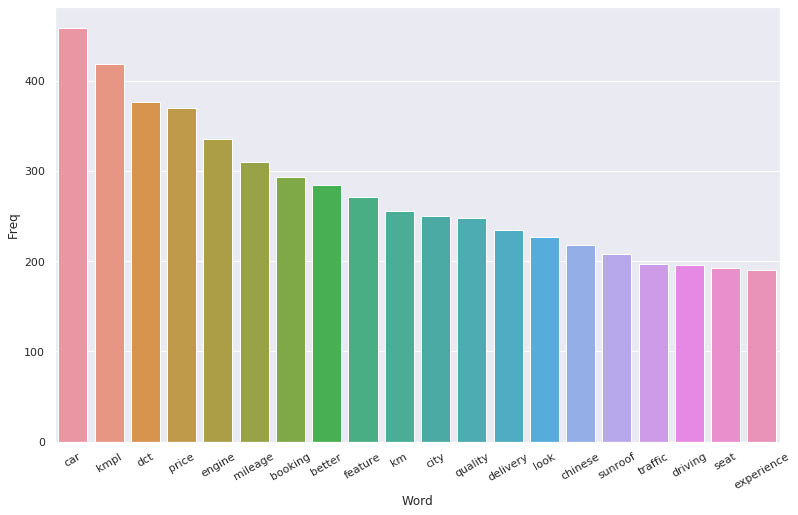

In [76]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

              Bi-gram  Freq
0       voice command    66
1          real world    55
2   panoramic sunroof    49
3           rear seat    46
4           dct sharp    45
5            sun roof    44
6     fuel efficiency    41
7           kmpl city    41
8            http com    39
9       took delivery    34
10        return kmpl    33
11      edit launched    32
12         fit finish    31
13       touch screen    31
14         named edit    31
15          com watch    30
16      build quality    30
17       crazy driver    29
18     booking reopen    29
19       city traffic    28


[Text(0, 0, 'voice command'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'panoramic sunroof'),
 Text(0, 0, 'rear seat'),
 Text(0, 0, 'dct sharp'),
 Text(0, 0, 'sun roof'),
 Text(0, 0, 'fuel efficiency'),
 Text(0, 0, 'kmpl city'),
 Text(0, 0, 'http com'),
 Text(0, 0, 'took delivery'),
 Text(0, 0, 'return kmpl'),
 Text(0, 0, 'edit launched'),
 Text(0, 0, 'fit finish'),
 Text(0, 0, 'touch screen'),
 Text(0, 0, 'named edit'),
 Text(0, 0, 'com watch'),
 Text(0, 0, 'build quality'),
 Text(0, 0, 'crazy driver'),
 Text(0, 0, 'booking reopen'),
 Text(0, 0, 'city traffic')]

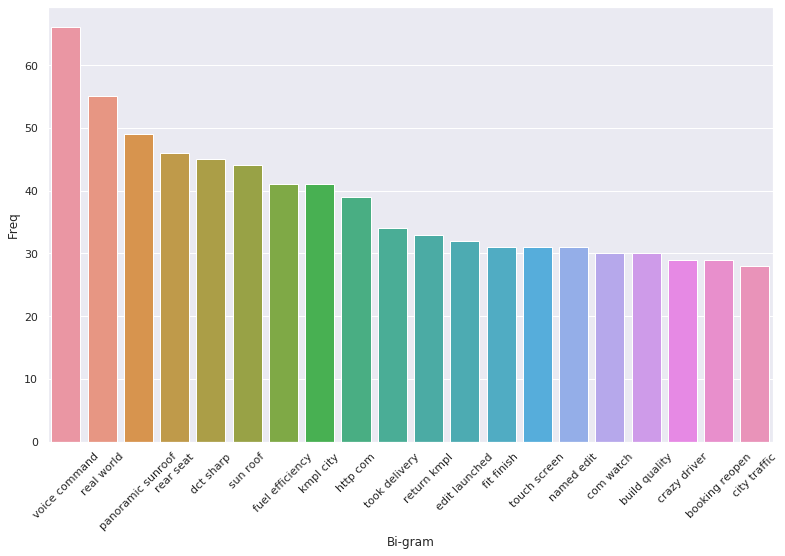

In [77]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                Tri-gram  Freq
0    named edit launched    31
1         http com watch    30
2     rain sensing wiper    19
3       thread non issue    18
4        non issue blown    18
5      frustrated fe say    17
6      fe say delivering    17
7    say delivering kmpl    17
8     delivering kmpl sa    17
9      kmpl sa convinced    17
10     sa convinced kmpl    17
11    apology rant worry    17
12    rant worry country    17
13      worry country ga    17
14         country ga ga    17
15          ga ga baojun    17
16     ga baojun willing    17
17    baojun willing cut    17
18     willing cut slack    17
19  cut slack automotive    17


[Text(0, 0, 'named edit launched'),
 Text(0, 0, 'http com watch'),
 Text(0, 0, 'rain sensing wiper'),
 Text(0, 0, 'thread non issue'),
 Text(0, 0, 'non issue blown'),
 Text(0, 0, 'frustrated fe say'),
 Text(0, 0, 'fe say delivering'),
 Text(0, 0, 'say delivering kmpl'),
 Text(0, 0, 'delivering kmpl sa'),
 Text(0, 0, 'kmpl sa convinced'),
 Text(0, 0, 'sa convinced kmpl'),
 Text(0, 0, 'apology rant worry'),
 Text(0, 0, 'rant worry country'),
 Text(0, 0, 'worry country ga'),
 Text(0, 0, 'country ga ga'),
 Text(0, 0, 'ga ga baojun'),
 Text(0, 0, 'ga baojun willing'),
 Text(0, 0, 'baojun willing cut'),
 Text(0, 0, 'willing cut slack'),
 Text(0, 0, 'cut slack automotive')]

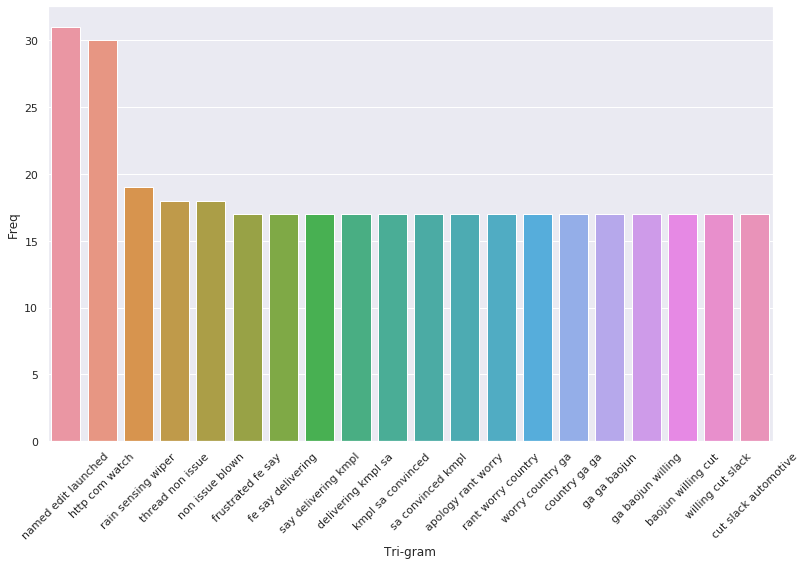

In [78]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)